In [130]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Reading the titenic dataset from CSV file
titanic_data = pd.read_csv('titanic data.csv', header = 0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
#Detecting number of missing value in Age dcolumn
age_null_bool = titanic_data['Age'].isnull()
missing_age_rows =  len(titanic_data[age_null_bool])
missing_age_rows

# There are 177 missing values in Age column

177

In [120]:
t_data = [titanic_data]
for dataset in t_data:
    print(pd.isnull(dataset).sum() > 0)

#We can see only Age, Cabin and Embarked column has missing values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [121]:
for data in titanic_data:
    null_bool = titanic_data[data].isnull()
    number_of_missing_rec = len(titanic_data[null_bool])
    print(f"{data:12} : {str(number_of_missing_rec)}")

"""
We can clearly see 
Age has 177 missing values
Cabin has 687 missing values
Embarked has 2 missing values
"""

PassengerId  : 0
Survived     : 0
Pclass       : 0
Name         : 0
Sex          : 0
Age          : 177
SibSp        : 0
Parch        : 0
Ticket       : 0
Fare         : 0
Cabin        : 687
Embarked     : 2


'\nWe can clearly see \nAge has 177 missing values\nCabin has 687 missing values\nEmbarked has 2 missing values\n'

In [122]:
td = titanic_data.values
td

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [128]:
# Imputing : Taking care of missing data
#Replacing missing Age with mean value of Age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(td[:,5:6])
td[:,5:6] = imputer.transform(td[:,5:6])
#Cross checking for null value in Age coulum
pd.isnull(td[:,5:6]).sum()

0

In [129]:
# Will drop Cabin column hence not imputing missing values in Cabin
#Replacing missing Emvarked with most frequent value of value of Embarked
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(td[:,:-1])
td[:,:-1] = imputer.transform(td[:,:-1])
# Cross Checking for null value in Embarked column
pd.isnull(td[:,:-1]).sum()

0

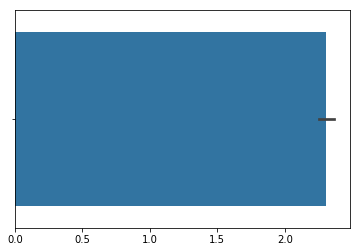

In [135]:
#Exploring and visualizing the data;
#Barplot
sns.barplot(td[:,2:3])

<BarContainer object of 891 artists>

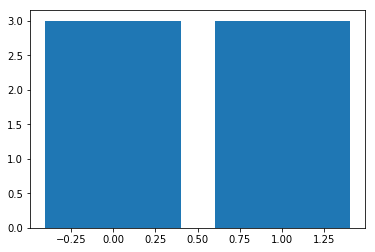

In [142]:
plt.bar(titanic_data['Survived'],height=3, width=0.8, bottom=None, align='center', data=None)